# 1. Make directories

In [1]:
import os

In [2]:
curr_path = os.getcwd()

In [3]:
curr_path

'C:\\Users\\dell\\Desktop\\projects\\Breaking_captcha'

In [13]:
os.makedirs('data')

In [29]:
curr_path = curr_path+'\\data'

In [45]:
for i in range(2,10):
    fn = os.path.join(curr_path, str(i))
    #print(fn)
    os.makedirs(fn)

In [46]:
import string
alpha = list(string.ascii_uppercase)

In [48]:
for i in alpha:
    if i not in ['O', 'I']:
        fn = os.path.join(curr_path, i)
        os.makedirs(fn)

we created a 32 folders to store the data

# 2. Transform data

In [4]:
import glob
import cv2
import imutils

In [5]:
curr_path = os.path.join(os.getcwd(),'captchas')

In [6]:
captcha_image_files = glob.glob(os.path.join(curr_path, "*"))

we split the captcha image so that that each letter is a separate image, then we only have to train the neural network to recognize a single letter at a time.

In [16]:
lettre_Folder_path = os.path.join(os.getcwd(), 'data')
counts = {}

for (i,path) in enumerate(captcha_image_files):
    print("[INFO] processing image {}/{}".format(i + 1, len(captcha_image_files)))
    
    # grab the base filename as the text
    filename = os.path.basename(path)
    label = os.path.splitext(filename)[0]
    
    # load the image and convert it to grayscale
    image = cv2.imread(path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # make a border
    gray = cv2.copyMakeBorder(gray, 8,8,8,8, cv2.BORDER_REPLICATE)
    # threshold the image (convert it to pure black and white)
    thres = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    # find the contours (continuous blobs of pixels) the image
    cnts, hierarchy = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #contours = contours[0] if imutils.is_cv2() else contours[1]

    #print(contours)
    lettre_image_contours = []
    for contour in cnts:
        (x, y, w, h) = cv2.boundingRect(contour)
        # condition
        
        if w/h > 1.25:
            half_w = int(w/2)
            lettre_image_contours.append((x, y, half_w, h))
            lettre_image_contours.append((x + half_w, y, half_w, h))

        else:
            lettre_image_contours.append((x, y, w, h))

    # # If we found more or less than 4 letters in the captcha, Skip the image
    if len(lettre_image_contours) != 4:
        continue


    lettre_image_contours = sorted(lettre_image_contours, key=lambda x: x[0])
    
    # Save out each letter as a single image
    for lettre_box, lettre in zip(lettre_image_contours, label):
        x, y, w, h = lettre_box
        
        letter_image = gray[y - 2:y + h + 2, x - 2:x + w + 2]

        # Get the folder to save the image in
        save_path = os.path.join(lettre_Folder_path, lettre)
        """
        # if the output directory does not exist, create it
        if not os.path.exists(save_path):
            os.makedirs(save_path)"""

        # write the letter image to a file
        count = counts.get(lettre, 1)
        p = os.path.join(save_path, "{}.png".format(str(count).zfill(6)))
        cv2.imwrite(p, letter_image)

        # increment the count for the current key
        counts[lettre] = count + 1


[INFO] processing image 1/65
[INFO] processing image 2/65
[INFO] processing image 3/65
[INFO] processing image 4/65
[INFO] processing image 5/65
[INFO] processing image 6/65
[INFO] processing image 7/65
[INFO] processing image 8/65
[INFO] processing image 9/65
[INFO] processing image 10/65
[INFO] processing image 11/65
[INFO] processing image 12/65
[INFO] processing image 13/65
[INFO] processing image 14/65
[INFO] processing image 15/65
[INFO] processing image 16/65
[INFO] processing image 17/65
[INFO] processing image 18/65
[INFO] processing image 19/65
[INFO] processing image 20/65
[INFO] processing image 21/65
[INFO] processing image 22/65
[INFO] processing image 23/65
[INFO] processing image 24/65
[INFO] processing image 25/65
[INFO] processing image 26/65
[INFO] processing image 27/65
[INFO] processing image 28/65
[INFO] processing image 29/65
[INFO] processing image 30/65
[INFO] processing image 31/65
[INFO] processing image 32/65
[INFO] processing image 33/65
[INFO] processing i

[INFO] processing image 271/65
[INFO] processing image 272/65
[INFO] processing image 273/65
[INFO] processing image 274/65
[INFO] processing image 275/65
[INFO] processing image 276/65
[INFO] processing image 277/65
[INFO] processing image 278/65
[INFO] processing image 279/65
[INFO] processing image 280/65
[INFO] processing image 281/65
[INFO] processing image 282/65
[INFO] processing image 283/65
[INFO] processing image 284/65
[INFO] processing image 285/65
[INFO] processing image 286/65
[INFO] processing image 287/65
[INFO] processing image 288/65
[INFO] processing image 289/65
[INFO] processing image 290/65
[INFO] processing image 291/65
[INFO] processing image 292/65
[INFO] processing image 293/65
[INFO] processing image 294/65
[INFO] processing image 295/65
[INFO] processing image 296/65
[INFO] processing image 297/65
[INFO] processing image 298/65
[INFO] processing image 299/65
[INFO] processing image 300/65
[INFO] processing image 301/65
[INFO] processing image 302/65
[INFO] p

[INFO] processing image 545/65
[INFO] processing image 546/65
[INFO] processing image 547/65
[INFO] processing image 548/65
[INFO] processing image 549/65
[INFO] processing image 550/65
[INFO] processing image 551/65
[INFO] processing image 552/65
[INFO] processing image 553/65
[INFO] processing image 554/65
[INFO] processing image 555/65
[INFO] processing image 556/65
[INFO] processing image 557/65
[INFO] processing image 558/65
[INFO] processing image 559/65
[INFO] processing image 560/65
[INFO] processing image 561/65
[INFO] processing image 562/65
[INFO] processing image 563/65
[INFO] processing image 564/65
[INFO] processing image 565/65
[INFO] processing image 566/65
[INFO] processing image 567/65
[INFO] processing image 568/65
[INFO] processing image 569/65
[INFO] processing image 570/65
[INFO] processing image 571/65
[INFO] processing image 572/65
[INFO] processing image 573/65
[INFO] processing image 574/65
[INFO] processing image 575/65
[INFO] processing image 576/65
[INFO] p

[INFO] processing image 815/65
[INFO] processing image 816/65
[INFO] processing image 817/65
[INFO] processing image 818/65
[INFO] processing image 819/65
[INFO] processing image 820/65
[INFO] processing image 821/65
[INFO] processing image 822/65
[INFO] processing image 823/65
[INFO] processing image 824/65
[INFO] processing image 825/65
[INFO] processing image 826/65
[INFO] processing image 827/65
[INFO] processing image 828/65
[INFO] processing image 829/65
[INFO] processing image 830/65
[INFO] processing image 831/65
[INFO] processing image 832/65
[INFO] processing image 833/65
[INFO] processing image 834/65
[INFO] processing image 835/65
[INFO] processing image 836/65
[INFO] processing image 837/65
[INFO] processing image 838/65
[INFO] processing image 839/65
[INFO] processing image 840/65
[INFO] processing image 841/65
[INFO] processing image 842/65
[INFO] processing image 843/65
[INFO] processing image 844/65
[INFO] processing image 845/65
[INFO] processing image 846/65
[INFO] p

[INFO] processing image 1077/65
[INFO] processing image 1078/65
[INFO] processing image 1079/65
[INFO] processing image 1080/65
[INFO] processing image 1081/65
[INFO] processing image 1082/65
[INFO] processing image 1083/65
[INFO] processing image 1084/65
[INFO] processing image 1085/65
[INFO] processing image 1086/65
[INFO] processing image 1087/65
[INFO] processing image 1088/65
[INFO] processing image 1089/65
[INFO] processing image 1090/65
[INFO] processing image 1091/65
[INFO] processing image 1092/65
[INFO] processing image 1093/65
[INFO] processing image 1094/65
[INFO] processing image 1095/65
[INFO] processing image 1096/65
[INFO] processing image 1097/65
[INFO] processing image 1098/65
[INFO] processing image 1099/65
[INFO] processing image 1100/65
[INFO] processing image 1101/65
[INFO] processing image 1102/65
[INFO] processing image 1103/65
[INFO] processing image 1104/65
[INFO] processing image 1105/65
[INFO] processing image 1106/65
[INFO] processing image 1107/65
[INFO] p

[INFO] processing image 1335/65
[INFO] processing image 1336/65
[INFO] processing image 1337/65
[INFO] processing image 1338/65
[INFO] processing image 1339/65
[INFO] processing image 1340/65
[INFO] processing image 1341/65
[INFO] processing image 1342/65
[INFO] processing image 1343/65
[INFO] processing image 1344/65
[INFO] processing image 1345/65
[INFO] processing image 1346/65
[INFO] processing image 1347/65
[INFO] processing image 1348/65
[INFO] processing image 1349/65
[INFO] processing image 1350/65
[INFO] processing image 1351/65
[INFO] processing image 1352/65
[INFO] processing image 1353/65
[INFO] processing image 1354/65
[INFO] processing image 1355/65
[INFO] processing image 1356/65
[INFO] processing image 1357/65
[INFO] processing image 1358/65
[INFO] processing image 1359/65
[INFO] processing image 1360/65
[INFO] processing image 1361/65
[INFO] processing image 1362/65
[INFO] processing image 1363/65
[INFO] processing image 1364/65
[INFO] processing image 1365/65
[INFO] p

[INFO] processing image 1596/65
[INFO] processing image 1597/65
[INFO] processing image 1598/65
[INFO] processing image 1599/65
[INFO] processing image 1600/65
[INFO] processing image 1601/65
[INFO] processing image 1602/65
[INFO] processing image 1603/65
[INFO] processing image 1604/65
[INFO] processing image 1605/65
[INFO] processing image 1606/65
[INFO] processing image 1607/65
[INFO] processing image 1608/65
[INFO] processing image 1609/65
[INFO] processing image 1610/65
[INFO] processing image 1611/65
[INFO] processing image 1612/65
[INFO] processing image 1613/65
[INFO] processing image 1614/65
[INFO] processing image 1615/65
[INFO] processing image 1616/65
[INFO] processing image 1617/65
[INFO] processing image 1618/65
[INFO] processing image 1619/65
[INFO] processing image 1620/65
[INFO] processing image 1621/65
[INFO] processing image 1622/65
[INFO] processing image 1623/65
[INFO] processing image 1624/65
[INFO] processing image 1625/65
[INFO] processing image 1626/65
[INFO] p

[INFO] processing image 1856/65
[INFO] processing image 1857/65
[INFO] processing image 1858/65
[INFO] processing image 1859/65
[INFO] processing image 1860/65
[INFO] processing image 1861/65
[INFO] processing image 1862/65
[INFO] processing image 1863/65
[INFO] processing image 1864/65
[INFO] processing image 1865/65
[INFO] processing image 1866/65
[INFO] processing image 1867/65
[INFO] processing image 1868/65
[INFO] processing image 1869/65
[INFO] processing image 1870/65
[INFO] processing image 1871/65
[INFO] processing image 1872/65
[INFO] processing image 1873/65
[INFO] processing image 1874/65
[INFO] processing image 1875/65
[INFO] processing image 1876/65
[INFO] processing image 1877/65
[INFO] processing image 1878/65
[INFO] processing image 1879/65
[INFO] processing image 1880/65
[INFO] processing image 1881/65
[INFO] processing image 1882/65
[INFO] processing image 1883/65
[INFO] processing image 1884/65
[INFO] processing image 1885/65
[INFO] processing image 1886/65
[INFO] p

[INFO] processing image 2116/65
[INFO] processing image 2117/65
[INFO] processing image 2118/65
[INFO] processing image 2119/65
[INFO] processing image 2120/65
[INFO] processing image 2121/65
[INFO] processing image 2122/65
[INFO] processing image 2123/65
[INFO] processing image 2124/65
[INFO] processing image 2125/65
[INFO] processing image 2126/65
[INFO] processing image 2127/65
[INFO] processing image 2128/65
[INFO] processing image 2129/65
[INFO] processing image 2130/65
[INFO] processing image 2131/65
[INFO] processing image 2132/65
[INFO] processing image 2133/65
[INFO] processing image 2134/65
[INFO] processing image 2135/65
[INFO] processing image 2136/65
[INFO] processing image 2137/65
[INFO] processing image 2138/65
[INFO] processing image 2139/65
[INFO] processing image 2140/65
[INFO] processing image 2141/65
[INFO] processing image 2142/65
[INFO] processing image 2143/65
[INFO] processing image 2144/65
[INFO] processing image 2145/65
[INFO] processing image 2146/65
[INFO] p

[INFO] processing image 2375/65
[INFO] processing image 2376/65
[INFO] processing image 2377/65
[INFO] processing image 2378/65
[INFO] processing image 2379/65
[INFO] processing image 2380/65
[INFO] processing image 2381/65
[INFO] processing image 2382/65
[INFO] processing image 2383/65
[INFO] processing image 2384/65
[INFO] processing image 2385/65
[INFO] processing image 2386/65
[INFO] processing image 2387/65
[INFO] processing image 2388/65
[INFO] processing image 2389/65
[INFO] processing image 2390/65
[INFO] processing image 2391/65
[INFO] processing image 2392/65
[INFO] processing image 2393/65
[INFO] processing image 2394/65
[INFO] processing image 2395/65
[INFO] processing image 2396/65
[INFO] processing image 2397/65
[INFO] processing image 2398/65
[INFO] processing image 2399/65
[INFO] processing image 2400/65
[INFO] processing image 2401/65
[INFO] processing image 2402/65
[INFO] processing image 2403/65
[INFO] processing image 2404/65
[INFO] processing image 2405/65
[INFO] p

[INFO] processing image 2634/65
[INFO] processing image 2635/65
[INFO] processing image 2636/65
[INFO] processing image 2637/65
[INFO] processing image 2638/65
[INFO] processing image 2639/65
[INFO] processing image 2640/65
[INFO] processing image 2641/65
[INFO] processing image 2642/65
[INFO] processing image 2643/65
[INFO] processing image 2644/65
[INFO] processing image 2645/65
[INFO] processing image 2646/65
[INFO] processing image 2647/65
[INFO] processing image 2648/65
[INFO] processing image 2649/65
[INFO] processing image 2650/65
[INFO] processing image 2651/65
[INFO] processing image 2652/65
[INFO] processing image 2653/65
[INFO] processing image 2654/65
[INFO] processing image 2655/65
[INFO] processing image 2656/65
[INFO] processing image 2657/65
[INFO] processing image 2658/65
[INFO] processing image 2659/65
[INFO] processing image 2660/65
[INFO] processing image 2661/65
[INFO] processing image 2662/65
[INFO] processing image 2663/65
[INFO] processing image 2664/65
[INFO] p

[INFO] processing image 2897/65
[INFO] processing image 2898/65
[INFO] processing image 2899/65
[INFO] processing image 2900/65
[INFO] processing image 2901/65
[INFO] processing image 2902/65
[INFO] processing image 2903/65
[INFO] processing image 2904/65
[INFO] processing image 2905/65
[INFO] processing image 2906/65
[INFO] processing image 2907/65
[INFO] processing image 2908/65
[INFO] processing image 2909/65
[INFO] processing image 2910/65
[INFO] processing image 2911/65
[INFO] processing image 2912/65
[INFO] processing image 2913/65
[INFO] processing image 2914/65
[INFO] processing image 2915/65
[INFO] processing image 2916/65
[INFO] processing image 2917/65
[INFO] processing image 2918/65
[INFO] processing image 2919/65
[INFO] processing image 2920/65
[INFO] processing image 2921/65
[INFO] processing image 2922/65
[INFO] processing image 2923/65
[INFO] processing image 2924/65
[INFO] processing image 2925/65
[INFO] processing image 2926/65
[INFO] processing image 2927/65
[INFO] p

[INFO] processing image 3157/65
[INFO] processing image 3158/65
[INFO] processing image 3159/65
[INFO] processing image 3160/65
[INFO] processing image 3161/65
[INFO] processing image 3162/65
[INFO] processing image 3163/65
[INFO] processing image 3164/65
[INFO] processing image 3165/65
[INFO] processing image 3166/65
[INFO] processing image 3167/65
[INFO] processing image 3168/65
[INFO] processing image 3169/65
[INFO] processing image 3170/65
[INFO] processing image 3171/65
[INFO] processing image 3172/65
[INFO] processing image 3173/65
[INFO] processing image 3174/65
[INFO] processing image 3175/65
[INFO] processing image 3176/65
[INFO] processing image 3177/65
[INFO] processing image 3178/65
[INFO] processing image 3179/65
[INFO] processing image 3180/65
[INFO] processing image 3181/65
[INFO] processing image 3182/65
[INFO] processing image 3183/65
[INFO] processing image 3184/65
[INFO] processing image 3185/65
[INFO] processing image 3186/65
[INFO] processing image 3187/65
[INFO] p

[INFO] processing image 3419/65
[INFO] processing image 3420/65
[INFO] processing image 3421/65
[INFO] processing image 3422/65
[INFO] processing image 3423/65
[INFO] processing image 3424/65
[INFO] processing image 3425/65
[INFO] processing image 3426/65
[INFO] processing image 3427/65
[INFO] processing image 3428/65
[INFO] processing image 3429/65
[INFO] processing image 3430/65
[INFO] processing image 3431/65
[INFO] processing image 3432/65
[INFO] processing image 3433/65
[INFO] processing image 3434/65
[INFO] processing image 3435/65
[INFO] processing image 3436/65
[INFO] processing image 3437/65
[INFO] processing image 3438/65
[INFO] processing image 3439/65
[INFO] processing image 3440/65
[INFO] processing image 3441/65
[INFO] processing image 3442/65
[INFO] processing image 3443/65
[INFO] processing image 3444/65
[INFO] processing image 3445/65
[INFO] processing image 3446/65
[INFO] processing image 3447/65
[INFO] processing image 3448/65
[INFO] processing image 3449/65
[INFO] p

[INFO] processing image 3681/65
[INFO] processing image 3682/65
[INFO] processing image 3683/65
[INFO] processing image 3684/65
[INFO] processing image 3685/65
[INFO] processing image 3686/65
[INFO] processing image 3687/65
[INFO] processing image 3688/65
[INFO] processing image 3689/65
[INFO] processing image 3690/65
[INFO] processing image 3691/65
[INFO] processing image 3692/65
[INFO] processing image 3693/65
[INFO] processing image 3694/65
[INFO] processing image 3695/65
[INFO] processing image 3696/65
[INFO] processing image 3697/65
[INFO] processing image 3698/65
[INFO] processing image 3699/65
[INFO] processing image 3700/65
[INFO] processing image 3701/65
[INFO] processing image 3702/65
[INFO] processing image 3703/65
[INFO] processing image 3704/65
[INFO] processing image 3705/65
[INFO] processing image 3706/65
[INFO] processing image 3707/65
[INFO] processing image 3708/65
[INFO] processing image 3709/65
[INFO] processing image 3710/65
[INFO] processing image 3711/65
[INFO] p

[INFO] processing image 3938/65
[INFO] processing image 3939/65
[INFO] processing image 3940/65
[INFO] processing image 3941/65
[INFO] processing image 3942/65
[INFO] processing image 3943/65
[INFO] processing image 3944/65
[INFO] processing image 3945/65
[INFO] processing image 3946/65
[INFO] processing image 3947/65
[INFO] processing image 3948/65
[INFO] processing image 3949/65
[INFO] processing image 3950/65
[INFO] processing image 3951/65
[INFO] processing image 3952/65
[INFO] processing image 3953/65
[INFO] processing image 3954/65
[INFO] processing image 3955/65
[INFO] processing image 3956/65
[INFO] processing image 3957/65
[INFO] processing image 3958/65
[INFO] processing image 3959/65
[INFO] processing image 3960/65
[INFO] processing image 3961/65
[INFO] processing image 3962/65
[INFO] processing image 3963/65
[INFO] processing image 3964/65
[INFO] processing image 3965/65
[INFO] processing image 3966/65
[INFO] processing image 3967/65
[INFO] processing image 3968/65
[INFO] p

[INFO] processing image 4195/65
[INFO] processing image 4196/65
[INFO] processing image 4197/65
[INFO] processing image 4198/65
[INFO] processing image 4199/65
[INFO] processing image 4200/65
[INFO] processing image 4201/65
[INFO] processing image 4202/65
[INFO] processing image 4203/65
[INFO] processing image 4204/65
[INFO] processing image 4205/65
[INFO] processing image 4206/65
[INFO] processing image 4207/65
[INFO] processing image 4208/65
[INFO] processing image 4209/65
[INFO] processing image 4210/65
[INFO] processing image 4211/65
[INFO] processing image 4212/65
[INFO] processing image 4213/65
[INFO] processing image 4214/65
[INFO] processing image 4215/65
[INFO] processing image 4216/65
[INFO] processing image 4217/65
[INFO] processing image 4218/65
[INFO] processing image 4219/65
[INFO] processing image 4220/65
[INFO] processing image 4221/65
[INFO] processing image 4222/65
[INFO] processing image 4223/65
[INFO] processing image 4224/65
[INFO] processing image 4225/65
[INFO] p

[INFO] processing image 4453/65
[INFO] processing image 4454/65
[INFO] processing image 4455/65
[INFO] processing image 4456/65
[INFO] processing image 4457/65
[INFO] processing image 4458/65
[INFO] processing image 4459/65
[INFO] processing image 4460/65
[INFO] processing image 4461/65
[INFO] processing image 4462/65
[INFO] processing image 4463/65
[INFO] processing image 4464/65
[INFO] processing image 4465/65
[INFO] processing image 4466/65
[INFO] processing image 4467/65
[INFO] processing image 4468/65
[INFO] processing image 4469/65
[INFO] processing image 4470/65
[INFO] processing image 4471/65
[INFO] processing image 4472/65
[INFO] processing image 4473/65
[INFO] processing image 4474/65
[INFO] processing image 4475/65
[INFO] processing image 4476/65
[INFO] processing image 4477/65
[INFO] processing image 4478/65
[INFO] processing image 4479/65
[INFO] processing image 4480/65
[INFO] processing image 4481/65
[INFO] processing image 4482/65
[INFO] processing image 4483/65
[INFO] p

[INFO] processing image 4713/65
[INFO] processing image 4714/65
[INFO] processing image 4715/65
[INFO] processing image 4716/65
[INFO] processing image 4717/65
[INFO] processing image 4718/65
[INFO] processing image 4719/65
[INFO] processing image 4720/65
[INFO] processing image 4721/65
[INFO] processing image 4722/65
[INFO] processing image 4723/65
[INFO] processing image 4724/65
[INFO] processing image 4725/65
[INFO] processing image 4726/65
[INFO] processing image 4727/65
[INFO] processing image 4728/65
[INFO] processing image 4729/65
[INFO] processing image 4730/65
[INFO] processing image 4731/65
[INFO] processing image 4732/65
[INFO] processing image 4733/65
[INFO] processing image 4734/65
[INFO] processing image 4735/65
[INFO] processing image 4736/65
[INFO] processing image 4737/65
[INFO] processing image 4738/65
[INFO] processing image 4739/65
[INFO] processing image 4740/65
[INFO] processing image 4741/65
[INFO] processing image 4742/65
[INFO] processing image 4743/65
[INFO] p

[INFO] processing image 4976/65
[INFO] processing image 4977/65
[INFO] processing image 4978/65
[INFO] processing image 4979/65
[INFO] processing image 4980/65
[INFO] processing image 4981/65
[INFO] processing image 4982/65
[INFO] processing image 4983/65
[INFO] processing image 4984/65
[INFO] processing image 4985/65
[INFO] processing image 4986/65
[INFO] processing image 4987/65
[INFO] processing image 4988/65
[INFO] processing image 4989/65
[INFO] processing image 4990/65
[INFO] processing image 4991/65
[INFO] processing image 4992/65
[INFO] processing image 4993/65
[INFO] processing image 4994/65
[INFO] processing image 4995/65
[INFO] processing image 4996/65
[INFO] processing image 4997/65
[INFO] processing image 4998/65
[INFO] processing image 4999/65
[INFO] processing image 5000/65
[INFO] processing image 5001/65
[INFO] processing image 5002/65
[INFO] processing image 5003/65
[INFO] processing image 5004/65
[INFO] processing image 5005/65
[INFO] processing image 5006/65
[INFO] p

[INFO] processing image 5234/65
[INFO] processing image 5235/65
[INFO] processing image 5236/65
[INFO] processing image 5237/65
[INFO] processing image 5238/65
[INFO] processing image 5239/65
[INFO] processing image 5240/65
[INFO] processing image 5241/65
[INFO] processing image 5242/65
[INFO] processing image 5243/65
[INFO] processing image 5244/65
[INFO] processing image 5245/65
[INFO] processing image 5246/65
[INFO] processing image 5247/65
[INFO] processing image 5248/65
[INFO] processing image 5249/65
[INFO] processing image 5250/65
[INFO] processing image 5251/65
[INFO] processing image 5252/65
[INFO] processing image 5253/65
[INFO] processing image 5254/65
[INFO] processing image 5255/65
[INFO] processing image 5256/65
[INFO] processing image 5257/65
[INFO] processing image 5258/65
[INFO] processing image 5259/65
[INFO] processing image 5260/65
[INFO] processing image 5261/65
[INFO] processing image 5262/65
[INFO] processing image 5263/65
[INFO] processing image 5264/65
[INFO] p

[INFO] processing image 5495/65
[INFO] processing image 5496/65
[INFO] processing image 5497/65
[INFO] processing image 5498/65
[INFO] processing image 5499/65
[INFO] processing image 5500/65
[INFO] processing image 5501/65
[INFO] processing image 5502/65
[INFO] processing image 5503/65
[INFO] processing image 5504/65
[INFO] processing image 5505/65
[INFO] processing image 5506/65
[INFO] processing image 5507/65
[INFO] processing image 5508/65
[INFO] processing image 5509/65
[INFO] processing image 5510/65
[INFO] processing image 5511/65
[INFO] processing image 5512/65
[INFO] processing image 5513/65
[INFO] processing image 5514/65
[INFO] processing image 5515/65
[INFO] processing image 5516/65
[INFO] processing image 5517/65
[INFO] processing image 5518/65
[INFO] processing image 5519/65
[INFO] processing image 5520/65
[INFO] processing image 5521/65
[INFO] processing image 5522/65
[INFO] processing image 5523/65
[INFO] processing image 5524/65
[INFO] processing image 5525/65
[INFO] p

[INFO] processing image 5757/65
[INFO] processing image 5758/65
[INFO] processing image 5759/65
[INFO] processing image 5760/65
[INFO] processing image 5761/65
[INFO] processing image 5762/65
[INFO] processing image 5763/65
[INFO] processing image 5764/65
[INFO] processing image 5765/65
[INFO] processing image 5766/65
[INFO] processing image 5767/65
[INFO] processing image 5768/65
[INFO] processing image 5769/65
[INFO] processing image 5770/65
[INFO] processing image 5771/65
[INFO] processing image 5772/65
[INFO] processing image 5773/65
[INFO] processing image 5774/65
[INFO] processing image 5775/65
[INFO] processing image 5776/65
[INFO] processing image 5777/65
[INFO] processing image 5778/65
[INFO] processing image 5779/65
[INFO] processing image 5780/65
[INFO] processing image 5781/65
[INFO] processing image 5782/65
[INFO] processing image 5783/65
[INFO] processing image 5784/65
[INFO] processing image 5785/65
[INFO] processing image 5786/65
[INFO] processing image 5787/65
[INFO] p

[INFO] processing image 6020/65
[INFO] processing image 6021/65
[INFO] processing image 6022/65
[INFO] processing image 6023/65
[INFO] processing image 6024/65
[INFO] processing image 6025/65
[INFO] processing image 6026/65
[INFO] processing image 6027/65
[INFO] processing image 6028/65
[INFO] processing image 6029/65
[INFO] processing image 6030/65
[INFO] processing image 6031/65
[INFO] processing image 6032/65
[INFO] processing image 6033/65
[INFO] processing image 6034/65
[INFO] processing image 6035/65
[INFO] processing image 6036/65
[INFO] processing image 6037/65
[INFO] processing image 6038/65
[INFO] processing image 6039/65
[INFO] processing image 6040/65
[INFO] processing image 6041/65
[INFO] processing image 6042/65
[INFO] processing image 6043/65
[INFO] processing image 6044/65
[INFO] processing image 6045/65
[INFO] processing image 6046/65
[INFO] processing image 6047/65
[INFO] processing image 6048/65
[INFO] processing image 6049/65
[INFO] processing image 6050/65
[INFO] p

[INFO] processing image 6278/65
[INFO] processing image 6279/65
[INFO] processing image 6280/65
[INFO] processing image 6281/65
[INFO] processing image 6282/65
[INFO] processing image 6283/65
[INFO] processing image 6284/65
[INFO] processing image 6285/65
[INFO] processing image 6286/65
[INFO] processing image 6287/65
[INFO] processing image 6288/65
[INFO] processing image 6289/65
[INFO] processing image 6290/65
[INFO] processing image 6291/65
[INFO] processing image 6292/65
[INFO] processing image 6293/65
[INFO] processing image 6294/65
[INFO] processing image 6295/65
[INFO] processing image 6296/65
[INFO] processing image 6297/65
[INFO] processing image 6298/65
[INFO] processing image 6299/65
[INFO] processing image 6300/65
[INFO] processing image 6301/65
[INFO] processing image 6302/65
[INFO] processing image 6303/65
[INFO] processing image 6304/65
[INFO] processing image 6305/65
[INFO] processing image 6306/65
[INFO] processing image 6307/65
[INFO] processing image 6308/65
[INFO] p

[INFO] processing image 6543/65
[INFO] processing image 6544/65
[INFO] processing image 6545/65
[INFO] processing image 6546/65
[INFO] processing image 6547/65
[INFO] processing image 6548/65
[INFO] processing image 6549/65
[INFO] processing image 6550/65
[INFO] processing image 6551/65
[INFO] processing image 6552/65
[INFO] processing image 6553/65
[INFO] processing image 6554/65
[INFO] processing image 6555/65
[INFO] processing image 6556/65
[INFO] processing image 6557/65
[INFO] processing image 6558/65
[INFO] processing image 6559/65
[INFO] processing image 6560/65
[INFO] processing image 6561/65
[INFO] processing image 6562/65
[INFO] processing image 6563/65
[INFO] processing image 6564/65
[INFO] processing image 6565/65
[INFO] processing image 6566/65
[INFO] processing image 6567/65
[INFO] processing image 6568/65
[INFO] processing image 6569/65
[INFO] processing image 6570/65
[INFO] processing image 6571/65
[INFO] processing image 6572/65
[INFO] processing image 6573/65
[INFO] p

[INFO] processing image 6808/65
[INFO] processing image 6809/65
[INFO] processing image 6810/65
[INFO] processing image 6811/65
[INFO] processing image 6812/65
[INFO] processing image 6813/65
[INFO] processing image 6814/65
[INFO] processing image 6815/65
[INFO] processing image 6816/65
[INFO] processing image 6817/65
[INFO] processing image 6818/65
[INFO] processing image 6819/65
[INFO] processing image 6820/65
[INFO] processing image 6821/65
[INFO] processing image 6822/65
[INFO] processing image 6823/65
[INFO] processing image 6824/65
[INFO] processing image 6825/65
[INFO] processing image 6826/65
[INFO] processing image 6827/65
[INFO] processing image 6828/65
[INFO] processing image 6829/65
[INFO] processing image 6830/65
[INFO] processing image 6831/65
[INFO] processing image 6832/65
[INFO] processing image 6833/65
[INFO] processing image 6834/65
[INFO] processing image 6835/65
[INFO] processing image 6836/65
[INFO] processing image 6837/65
[INFO] processing image 6838/65
[INFO] p

[INFO] processing image 7068/65
[INFO] processing image 7069/65
[INFO] processing image 7070/65
[INFO] processing image 7071/65
[INFO] processing image 7072/65
[INFO] processing image 7073/65
[INFO] processing image 7074/65
[INFO] processing image 7075/65
[INFO] processing image 7076/65
[INFO] processing image 7077/65
[INFO] processing image 7078/65
[INFO] processing image 7079/65
[INFO] processing image 7080/65
[INFO] processing image 7081/65
[INFO] processing image 7082/65
[INFO] processing image 7083/65
[INFO] processing image 7084/65
[INFO] processing image 7085/65
[INFO] processing image 7086/65
[INFO] processing image 7087/65
[INFO] processing image 7088/65
[INFO] processing image 7089/65
[INFO] processing image 7090/65
[INFO] processing image 7091/65
[INFO] processing image 7092/65
[INFO] processing image 7093/65
[INFO] processing image 7094/65
[INFO] processing image 7095/65
[INFO] processing image 7096/65
[INFO] processing image 7097/65
[INFO] processing image 7098/65
[INFO] p

[INFO] processing image 7329/65
[INFO] processing image 7330/65
[INFO] processing image 7331/65
[INFO] processing image 7332/65
[INFO] processing image 7333/65
[INFO] processing image 7334/65
[INFO] processing image 7335/65
[INFO] processing image 7336/65
[INFO] processing image 7337/65
[INFO] processing image 7338/65
[INFO] processing image 7339/65
[INFO] processing image 7340/65
[INFO] processing image 7341/65
[INFO] processing image 7342/65
[INFO] processing image 7343/65
[INFO] processing image 7344/65
[INFO] processing image 7345/65
[INFO] processing image 7346/65
[INFO] processing image 7347/65
[INFO] processing image 7348/65
[INFO] processing image 7349/65
[INFO] processing image 7350/65
[INFO] processing image 7351/65
[INFO] processing image 7352/65
[INFO] processing image 7353/65
[INFO] processing image 7354/65
[INFO] processing image 7355/65
[INFO] processing image 7356/65
[INFO] processing image 7357/65
[INFO] processing image 7358/65
[INFO] processing image 7359/65
[INFO] p

[INFO] processing image 7586/65
[INFO] processing image 7587/65
[INFO] processing image 7588/65
[INFO] processing image 7589/65
[INFO] processing image 7590/65
[INFO] processing image 7591/65
[INFO] processing image 7592/65
[INFO] processing image 7593/65
[INFO] processing image 7594/65
[INFO] processing image 7595/65
[INFO] processing image 7596/65
[INFO] processing image 7597/65
[INFO] processing image 7598/65
[INFO] processing image 7599/65
[INFO] processing image 7600/65
[INFO] processing image 7601/65
[INFO] processing image 7602/65
[INFO] processing image 7603/65
[INFO] processing image 7604/65
[INFO] processing image 7605/65
[INFO] processing image 7606/65
[INFO] processing image 7607/65
[INFO] processing image 7608/65
[INFO] processing image 7609/65
[INFO] processing image 7610/65
[INFO] processing image 7611/65
[INFO] processing image 7612/65
[INFO] processing image 7613/65
[INFO] processing image 7614/65
[INFO] processing image 7615/65
[INFO] processing image 7616/65
[INFO] p

[INFO] processing image 7847/65
[INFO] processing image 7848/65
[INFO] processing image 7849/65
[INFO] processing image 7850/65
[INFO] processing image 7851/65
[INFO] processing image 7852/65
[INFO] processing image 7853/65
[INFO] processing image 7854/65
[INFO] processing image 7855/65
[INFO] processing image 7856/65
[INFO] processing image 7857/65
[INFO] processing image 7858/65
[INFO] processing image 7859/65
[INFO] processing image 7860/65
[INFO] processing image 7861/65
[INFO] processing image 7862/65
[INFO] processing image 7863/65
[INFO] processing image 7864/65
[INFO] processing image 7865/65
[INFO] processing image 7866/65
[INFO] processing image 7867/65
[INFO] processing image 7868/65
[INFO] processing image 7869/65
[INFO] processing image 7870/65
[INFO] processing image 7871/65
[INFO] processing image 7872/65
[INFO] processing image 7873/65
[INFO] processing image 7874/65
[INFO] processing image 7875/65
[INFO] processing image 7876/65
[INFO] processing image 7877/65
[INFO] p

[INFO] processing image 8105/65
[INFO] processing image 8106/65
[INFO] processing image 8107/65
[INFO] processing image 8108/65
[INFO] processing image 8109/65
[INFO] processing image 8110/65
[INFO] processing image 8111/65
[INFO] processing image 8112/65
[INFO] processing image 8113/65
[INFO] processing image 8114/65
[INFO] processing image 8115/65
[INFO] processing image 8116/65
[INFO] processing image 8117/65
[INFO] processing image 8118/65
[INFO] processing image 8119/65
[INFO] processing image 8120/65
[INFO] processing image 8121/65
[INFO] processing image 8122/65
[INFO] processing image 8123/65
[INFO] processing image 8124/65
[INFO] processing image 8125/65
[INFO] processing image 8126/65
[INFO] processing image 8127/65
[INFO] processing image 8128/65
[INFO] processing image 8129/65
[INFO] processing image 8130/65
[INFO] processing image 8131/65
[INFO] processing image 8132/65
[INFO] processing image 8133/65
[INFO] processing image 8134/65
[INFO] processing image 8135/65
[INFO] p

[INFO] processing image 8363/65
[INFO] processing image 8364/65
[INFO] processing image 8365/65
[INFO] processing image 8366/65
[INFO] processing image 8367/65
[INFO] processing image 8368/65
[INFO] processing image 8369/65
[INFO] processing image 8370/65
[INFO] processing image 8371/65
[INFO] processing image 8372/65
[INFO] processing image 8373/65
[INFO] processing image 8374/65
[INFO] processing image 8375/65
[INFO] processing image 8376/65
[INFO] processing image 8377/65
[INFO] processing image 8378/65
[INFO] processing image 8379/65
[INFO] processing image 8380/65
[INFO] processing image 8381/65
[INFO] processing image 8382/65
[INFO] processing image 8383/65
[INFO] processing image 8384/65
[INFO] processing image 8385/65
[INFO] processing image 8386/65
[INFO] processing image 8387/65
[INFO] processing image 8388/65
[INFO] processing image 8389/65
[INFO] processing image 8390/65
[INFO] processing image 8391/65
[INFO] processing image 8392/65
[INFO] processing image 8393/65
[INFO] p

[INFO] processing image 8622/65
[INFO] processing image 8623/65
[INFO] processing image 8624/65
[INFO] processing image 8625/65
[INFO] processing image 8626/65
[INFO] processing image 8627/65
[INFO] processing image 8628/65
[INFO] processing image 8629/65
[INFO] processing image 8630/65
[INFO] processing image 8631/65
[INFO] processing image 8632/65
[INFO] processing image 8633/65
[INFO] processing image 8634/65
[INFO] processing image 8635/65
[INFO] processing image 8636/65
[INFO] processing image 8637/65
[INFO] processing image 8638/65
[INFO] processing image 8639/65
[INFO] processing image 8640/65
[INFO] processing image 8641/65
[INFO] processing image 8642/65
[INFO] processing image 8643/65
[INFO] processing image 8644/65
[INFO] processing image 8645/65
[INFO] processing image 8646/65
[INFO] processing image 8647/65
[INFO] processing image 8648/65
[INFO] processing image 8649/65
[INFO] processing image 8650/65
[INFO] processing image 8651/65
[INFO] processing image 8652/65
[INFO] p

[INFO] processing image 8883/65
[INFO] processing image 8884/65
[INFO] processing image 8885/65
[INFO] processing image 8886/65
[INFO] processing image 8887/65
[INFO] processing image 8888/65
[INFO] processing image 8889/65
[INFO] processing image 8890/65
[INFO] processing image 8891/65
[INFO] processing image 8892/65
[INFO] processing image 8893/65
[INFO] processing image 8894/65
[INFO] processing image 8895/65
[INFO] processing image 8896/65
[INFO] processing image 8897/65
[INFO] processing image 8898/65
[INFO] processing image 8899/65
[INFO] processing image 8900/65
[INFO] processing image 8901/65
[INFO] processing image 8902/65
[INFO] processing image 8903/65
[INFO] processing image 8904/65
[INFO] processing image 8905/65
[INFO] processing image 8906/65
[INFO] processing image 8907/65
[INFO] processing image 8908/65
[INFO] processing image 8909/65
[INFO] processing image 8910/65
[INFO] processing image 8911/65
[INFO] processing image 8912/65
[INFO] processing image 8913/65
[INFO] p

[INFO] processing image 9142/65
[INFO] processing image 9143/65
[INFO] processing image 9144/65
[INFO] processing image 9145/65
[INFO] processing image 9146/65
[INFO] processing image 9147/65
[INFO] processing image 9148/65
[INFO] processing image 9149/65
[INFO] processing image 9150/65
[INFO] processing image 9151/65
[INFO] processing image 9152/65
[INFO] processing image 9153/65
[INFO] processing image 9154/65
[INFO] processing image 9155/65
[INFO] processing image 9156/65
[INFO] processing image 9157/65
[INFO] processing image 9158/65
[INFO] processing image 9159/65
[INFO] processing image 9160/65
[INFO] processing image 9161/65
[INFO] processing image 9162/65
[INFO] processing image 9163/65
[INFO] processing image 9164/65
[INFO] processing image 9165/65
[INFO] processing image 9166/65
[INFO] processing image 9167/65
[INFO] processing image 9168/65
[INFO] processing image 9169/65
[INFO] processing image 9170/65
[INFO] processing image 9171/65
[INFO] processing image 9172/65
[INFO] p

[INFO] processing image 9414/65
[INFO] processing image 9415/65
[INFO] processing image 9416/65
[INFO] processing image 9417/65
[INFO] processing image 9418/65
[INFO] processing image 9419/65
[INFO] processing image 9420/65
[INFO] processing image 9421/65
[INFO] processing image 9422/65
[INFO] processing image 9423/65
[INFO] processing image 9424/65
[INFO] processing image 9425/65
[INFO] processing image 9426/65
[INFO] processing image 9427/65
[INFO] processing image 9428/65
[INFO] processing image 9429/65
[INFO] processing image 9430/65
[INFO] processing image 9431/65
[INFO] processing image 9432/65
[INFO] processing image 9433/65
[INFO] processing image 9434/65
[INFO] processing image 9435/65
[INFO] processing image 9436/65
[INFO] processing image 9437/65
[INFO] processing image 9438/65
[INFO] processing image 9439/65
[INFO] processing image 9440/65
[INFO] processing image 9441/65
[INFO] processing image 9442/65
[INFO] processing image 9443/65
[INFO] processing image 9444/65
[INFO] p

[INFO] processing image 9671/65
[INFO] processing image 9672/65
[INFO] processing image 9673/65
[INFO] processing image 9674/65
[INFO] processing image 9675/65
[INFO] processing image 9676/65
[INFO] processing image 9677/65
[INFO] processing image 9678/65
[INFO] processing image 9679/65
[INFO] processing image 9680/65
[INFO] processing image 9681/65
[INFO] processing image 9682/65
[INFO] processing image 9683/65
[INFO] processing image 9684/65
[INFO] processing image 9685/65
[INFO] processing image 9686/65
[INFO] processing image 9687/65
[INFO] processing image 9688/65
[INFO] processing image 9689/65
[INFO] processing image 9690/65
[INFO] processing image 9691/65
[INFO] processing image 9692/65
[INFO] processing image 9693/65
[INFO] processing image 9694/65
[INFO] processing image 9695/65
[INFO] processing image 9696/65
[INFO] processing image 9697/65
[INFO] processing image 9698/65
[INFO] processing image 9699/65
[INFO] processing image 9700/65
[INFO] processing image 9701/65
[INFO] p

[INFO] processing image 9932/65
[INFO] processing image 9933/65
[INFO] processing image 9934/65
[INFO] processing image 9935/65
[INFO] processing image 9936/65
[INFO] processing image 9937/65
[INFO] processing image 9938/65
[INFO] processing image 9939/65
[INFO] processing image 9940/65
[INFO] processing image 9941/65
[INFO] processing image 9942/65
[INFO] processing image 9943/65
[INFO] processing image 9944/65
[INFO] processing image 9945/65
[INFO] processing image 9946/65
[INFO] processing image 9947/65
[INFO] processing image 9948/65
[INFO] processing image 9949/65
[INFO] processing image 9950/65
[INFO] processing image 9951/65
[INFO] processing image 9952/65
[INFO] processing image 9953/65
[INFO] processing image 9954/65
[INFO] processing image 9955/65


In [15]:
data_path = os.path.join(os.getcwd(),'data')

In [24]:
data_folders = glob.glob(os.path.join(data_path, "*"))

How many images do we have in each folder ?

In [30]:
for i in data_folders:
    l = glob.glob(os.path.join(i, "*"))
    print("Folder {0} has {1}".format(i[-1],len(l)))

Folder 2 has 1204
Folder 3 has 1203
Folder 4 has 1197
Folder 5 has 1231
Folder 6 has 1160
Folder 7 has 1284
Folder 8 has 1214
Folder 9 has 1357
Folder A has 1188
Folder B has 1199
Folder C has 1202
Folder D has 1199
Folder E has 1261
Folder F has 1177
Folder G has 1224
Folder H has 1221
Folder J has 1115
Folder K has 1220
Folder L has 1198
Folder M has 1170
Folder N has 1249
Folder P has 1244
Folder Q has 1208
Folder R has 1221
Folder S has 1227
Folder T has 1220
Folder U has 1199
Folder V has 1154
Folder W has 1147
Folder X has 1207
Folder Y has 1218
Folder Z has 1226


This is a function that we'll use it before training the data

In [7]:
def preprocessImage(image, width, height):
    h,w = image.shape[:2]
    
    if w > h:
        image = imutils.resize(image, width=width)
    else:
        image = imutils.resize(image, height=height)
        
    
    padW = int((width-image.shape[1])/2.0)
    padH = int((height-image.shape[0])/2.0)
    # Make border
    image = cv2.copyMakeBorder(image, padH, padH, padW, padW, cv2.BORDER_REPLICATE)
    
    # Make sure the size of image is (width, height)
    image = cv2.resize(image, (width, height))
    
    return image

# 3. Training v1

We'll use the image_dataset_from_directory function from tensorflow.keras.preprocessing

In [5]:
import pathlib

In [6]:
data_path = pathlib.Path(data_path)

In [13]:
data_path

WindowsPath('C:/Users/dell/Desktop/projects/Breaking_captcha/data')

In [9]:
list(data_path.glob('**/'))

[WindowsPath('C:/Users/dell/Desktop/projects/Breaking_captcha/data'),
 WindowsPath('C:/Users/dell/Desktop/projects/Breaking_captcha/data/2'),
 WindowsPath('C:/Users/dell/Desktop/projects/Breaking_captcha/data/3'),
 WindowsPath('C:/Users/dell/Desktop/projects/Breaking_captcha/data/4'),
 WindowsPath('C:/Users/dell/Desktop/projects/Breaking_captcha/data/5'),
 WindowsPath('C:/Users/dell/Desktop/projects/Breaking_captcha/data/6'),
 WindowsPath('C:/Users/dell/Desktop/projects/Breaking_captcha/data/7'),
 WindowsPath('C:/Users/dell/Desktop/projects/Breaking_captcha/data/8'),
 WindowsPath('C:/Users/dell/Desktop/projects/Breaking_captcha/data/9'),
 WindowsPath('C:/Users/dell/Desktop/projects/Breaking_captcha/data/A'),
 WindowsPath('C:/Users/dell/Desktop/projects/Breaking_captcha/data/B'),
 WindowsPath('C:/Users/dell/Desktop/projects/Breaking_captcha/data/C'),
 WindowsPath('C:/Users/dell/Desktop/projects/Breaking_captcha/data/D'),
 WindowsPath('C:/Users/dell/Desktop/projects/Breaking_captcha/data

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [8]:
batch_size = 32
img_height = 28
img_width = 28

In [9]:
train_data = image_dataset_from_directory(data_path,
                                         validation_split=0.2,
                                         subset="training",
                                         image_size=(img_height, img_width),
                                         batch_size=batch_size,
                                         seed=3)

Found 38744 files belonging to 32 classes.
Using 30996 files for training.


In [11]:
test_data = image_dataset_from_directory(
    data_path,
    validation_split=0.2,
    subset="validation",
    seed=3,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    )

Found 38744 files belonging to 32 classes.
Using 7748 files for validation.


In [12]:
class_names = train_data.class_names

## 3.1 Data training

In [1]:
import matplotlib.pyplot as plt

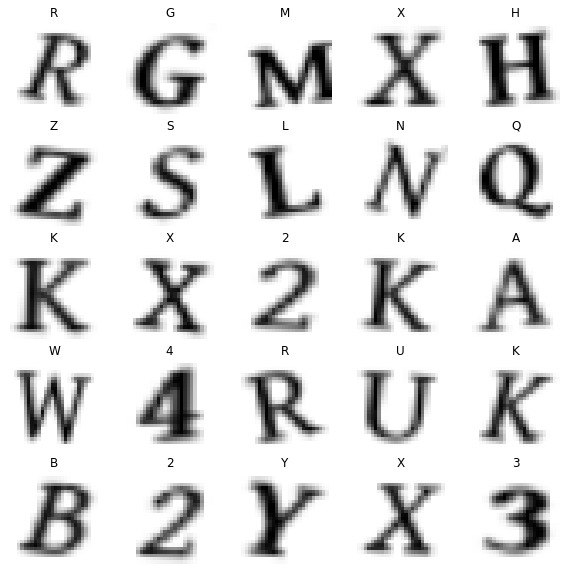

In [14]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

## 3.2 Model

In [83]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [33]:
num_classes = len(class_names)
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(20, (5,5), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    
  layers.Conv2D(50, (5,5), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    
  #layers.Conv2D(64, 3, padding='same', activation='relu'),
  #layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(500, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 28, 28, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 20)        1520      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2450)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               1

In [37]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [41]:
History = model.fit(train_data, validation_data=test_data, epochs=15)

Epoch 1/15
969/969 [==============================] - 39s 40ms/step - loss: 0.0029 - accuracy: 0.9993 - val_loss: 0.0087 - val_accuracy: 0.9987
Epoch 2/15
969/969 [==============================] - 41s 42ms/step - loss: 0.0040 - accuracy: 0.9991 - val_loss: 0.0119 - val_accuracy: 0.9973
Epoch 3/15
969/969 [==============================] - 42s 43ms/step - loss: 0.0038 - accuracy: 0.9990 - val_loss: 0.0151 - val_accuracy: 0.9982
Epoch 4/15
969/969 [==============================] - 42s 43ms/step - loss: 0.0021 - accuracy: 0.9997 - val_loss: 0.0170 - val_accuracy: 0.9977
Epoch 5/15
969/969 [==============================] - 42s 44ms/step - loss: 0.0017 - accuracy: 0.9993 - val_loss: 0.0150 - val_accuracy: 0.9978
Epoch 6/15
969/969 [==============================] - 42s 43ms/step - loss: 0.0022 - accuracy: 0.9996 - val_loss: 0.0110 - val_accuracy: 0.9979
Epoch 7/15
969/969 [==============================] - 43s 44ms/step - loss: 0.0068 - accuracy: 0.9988 - val_loss: 0.0229 - val_accuracy:

## 3.3 Performance

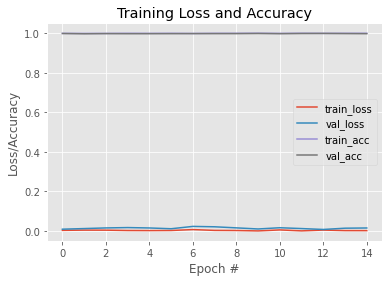

In [48]:
import numpy as np
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), History.history["loss"], label="train_loss")
plt.plot(np.arange(0, 15), History.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 15), History.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 15), History.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

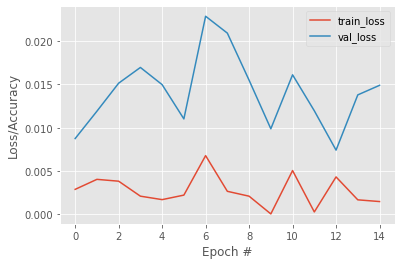

In [46]:
plt.figure()
plt.plot(np.arange(0, 15), History.history["loss"], label="train_loss")
plt.plot(np.arange(0, 15), History.history["val_loss"], label="val_loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

## 3.4 Save model

In [49]:
model.save("captcha_model_v1.hdf5")

# 4. Training V2

We'll use preprocessImage function that we created before and we'll load the data manuelly

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [16]:
data = []
labels = []
list_images = glob.glob(os.path.join(data_path, "*\*"))
for imag in list_images:
    image = cv2.imread(imag)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = preprocessImage(image, 28, 28)
    
    # Add a third channel dimension to the image to make Keras happy
    image = np.expand_dims(image, axis=2)
    data.append(image)
    label = imag.split(os.path.sep)[-2]
    labels.append(label)

data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

# Split the training data into separate train and test sets
(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels, test_size=0.25, random_state=0)
# Convert the labels (letters) into one-hot encodings that Keras can work with
lb = LabelBinarizer().fit(Y_train)
Y_train = lb.transform(Y_train)
Y_test = lb.transform(Y_test)

In [17]:
X_test.shape

(9686, 28, 28, 1)

## 4.1 Model

In [84]:
model2 = Sequential([
  
  layers.Conv2D(20, (5,5), padding='same', input_shape = (28,28,1), activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    
  layers.Conv2D(50, (5,5), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

  layers.Flatten(),
  layers.Dense(500, activation='relu'),
  layers.Dense(32, activation='softmax')
])

In [88]:
# Ask Keras to build the TensorFlow model behind the scenes
model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the neural network
h = model2.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=32, epochs=15)

Epoch 1/15
909/909 [==============================] - 24s 26ms/step - loss: 0.1673 - accuracy: 0.9598 - val_loss: 0.0210 - val_accuracy: 0.9950
Epoch 2/15
909/909 [==============================] - 28s 31ms/step - loss: 0.0112 - accuracy: 0.9971 - val_loss: 0.0109 - val_accuracy: 0.9973
Epoch 3/15
909/909 [==============================] - 29s 32ms/step - loss: 0.0058 - accuracy: 0.9982 - val_loss: 0.0076 - val_accuracy: 0.9976
Epoch 4/15
909/909 [==============================] - 30s 33ms/step - loss: 0.0056 - accuracy: 0.9985 - val_loss: 0.0077 - val_accuracy: 0.9980
Epoch 5/15
909/909 [==============================] - 30s 33ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.0073 - val_accuracy: 0.9987
Epoch 6/15
909/909 [==============================] - 31s 34ms/step - loss: 0.0054 - accuracy: 0.9985 - val_loss: 0.0119 - val_accuracy: 0.9970
Epoch 7/15
909/909 [==============================] - 31s 34ms/step - loss: 0.0027 - accuracy: 0.9993 - val_loss: 0.0058 - val_accuracy:

## 4.2 Performance

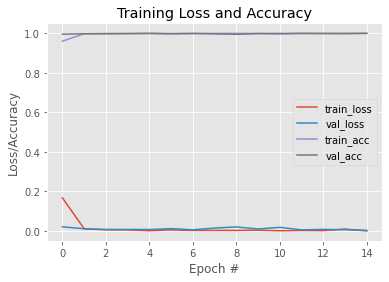

In [90]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), h.history["loss"], label="train_loss")
plt.plot(np.arange(0, 15), h.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 15), h.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 15), h.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

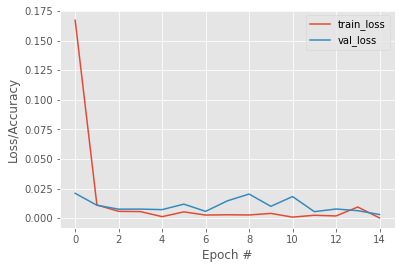

In [92]:
plt.figure()
plt.plot(np.arange(0, 15), h.history["loss"], label="train_loss")
plt.plot(np.arange(0, 15), h.history["val_loss"], label="val_loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

## 4.3 Save model

In [93]:
model2.save("captcha_model_v2.hdf5")

# 5. Testing

In [8]:
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

## 5.1 Test the 1st model

In [54]:
model = load_model("captcha_model_v1.hdf5")

In [55]:
data_path = os.path.join(os.getcwd(),'data')
class_names = [i[-1:] for i in glob.glob(os.path.join(data_path, "*"))]

In [56]:
captcha_image_files = glob.glob(os.path.join(curr_path, "*"))

In [59]:
c_i_f = np.random.choice(captcha_image_files, size=(5,), replace=False)
out = []
for image_file in c_i_f:
    # Load the image and convert it to grayscale
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Add some extra padding around the image
    image = cv2.copyMakeBorder(image, 20, 20, 20, 20, cv2.BORDER_REPLICATE)

    # threshold the image (convert it to pure black and white)
    thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    # find the contours (continuous blobs of pixels) the image
    contours,_ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Hack for compatibility with different OpenCV versions
    #contours = contours[0] if imutils.is_cv2() else contours[1]

    letter_image_regions = []
       # Now we can loop through each of the four contours and extract the letter
    # inside of each one
    for contour in contours:
        # Get the rectangle that contains the contour
        (x, y, w, h) = cv2.boundingRect(contour)

        # Compare the width and height of the contour to detect letters that
        # are conjoined into one chunk
        if w / h > 1.25:
            # This contour is too wide to be a single letter!
            # Split it in half into two letter regions!
            half_width = int(w / 2)
            letter_image_regions.append((x, y, half_width, h))
            letter_image_regions.append((x + half_width, y, half_width, h))
        else:
            # This is a normal letter by itself
            letter_image_regions.append((x, y, w, h))

    # If we found more or less than 4 letters in the captcha, our letter extraction
    # didn't work correcly. Skip the image instead of saving bad training data!
    if len(letter_image_regions) != 4:
        continue

    # Sort the detected letter images based on the x coordinate to make sure
    # we are processing them from left-to-right so we match the right image
    # with the right letter
    letter_image_regions = sorted(letter_image_regions, key=lambda x: x[0])
    # Create an output image and a list to hold our predicted letters
    output = cv2.merge([image] * 3)
    predictions = []

    # loop over the lektters
    for letter_bounding_box in letter_image_regions:
        # Grab the coordinates of the letter in the image
        x, y, w, h = letter_bounding_box

        # Extract the letter from the original image with a 2-pixel margin around the edge
        letter_image = image[y - 2:y + h + 2, x - 2:x + w + 2]

        # Re-size the letter image to 28x28 pixels to match training data
        letter_image = cv2.cvtColor(letter_image, cv2.COLOR_GRAY2RGB)
        letter_image = cv2.resize(letter_image, (28, 28))
        #print(letter_image.shape)
        letter_image = letter_image.reshape(1,28,28,3)
        #print(letter_image.shape)
        
        # Ask the neural network to make a prediction
        prediction = model.predict_classes(letter_image)

        letter = class_names[prediction[0]]
        predictions.append(letter)

        # draw the prediction on the output image
        cv2.rectangle(output, (x - 2, y - 2), (x + w + 4, y + h + 4), (0, 255, 0), 1)
        cv2.putText(output, letter, (x - 5, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.55, (0, 255, 0), 2)
    # Print the captcha's text
    captcha_text = "".join(predictions)
    print("CAPTCHA text is: {}".format(captcha_text))
    out.append(output)
    # Show the annotated image
    cv2.imshow("Output", output)
    cv2.waitKey()

cv2.destroyAllWindows()

CAPTCHA text is: 2PFS
CAPTCHA text is: PW5U
CAPTCHA text is: 47QJ
CAPTCHA text is: H2RY
CAPTCHA text is: FPVS


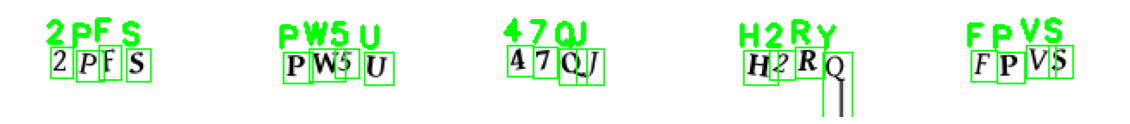

In [60]:
plt.figure(figsize=(20, 20))
for i,img in enumerate(out[:]):
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis("off")

## 5.2 Test the 2d model

In [9]:
model2 = load_model("captcha_model_v2.hdf5")

In [51]:
c_i_f = np.random.choice(captcha_image_files, size=(10,), replace=False)
out = []
for image_file in c_i_f:
    # Load the image and convert it to grayscale
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Add some extra padding around the image
    image = cv2.copyMakeBorder(image, 20, 20, 20, 20, cv2.BORDER_REPLICATE)

    # threshold the image (convert it to pure black and white)
    thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    # find the contours (continuous blobs of pixels) the image
    contours,_ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    letter_image_regions = []
       # Now we can loop through each of the four contours and extract the letter
    # inside of each one
    for contour in contours:
        # Get the rectangle that contains the contour
        (x, y, w, h) = cv2.boundingRect(contour)

        # Compare the width and height of the contour to detect letters that
        # are conjoined into one chunk
        if w / h > 1.25:
            # This contour is too wide to be a single letter!
            # Split it in half into two letter regions!
            half_width = int(w / 2)
            letter_image_regions.append((x, y, half_width, h))
            letter_image_regions.append((x + half_width, y, half_width, h))
        else:
            # This is a normal letter by itself
            letter_image_regions.append((x, y, w, h))

    # If we found more or less than 4 letters in the captcha, our letter extraction
    # didn't work correcly. Skip the image instead of saving bad training data!
    if len(letter_image_regions) != 4:
        continue
        
    # Sort the detected letter images based on the x coordinate to make sure
    # we are processing them from left-to-right so we match the right image
    # with the right letter
    letter_image_regions = sorted(letter_image_regions, key=lambda x: x[0])
    # Create an output image and a list to hold our predicted letters
    output = cv2.merge([image] * 3)
    predictions = []

    # loop over the lektters
    for letter_bounding_box in letter_image_regions:
        # Grab the coordinates of the letter in the image
        x, y, w, h = letter_bounding_box

        # Extract the letter from the original image with a 2-pixel margin around the edge
        letter_image = image[y - 2:y + h + 2, x - 2:x + w + 2]
        # Re-size the letter image to 28x28 pixels to match training data
        letter_image = preprocessImage(letter_image, 28, 28)
        # Turn the single image into a 4d list of images to make Keras happy
        letter_image = np.expand_dims(letter_image, axis=2)
        letter_image = np.expand_dims(letter_image, axis=0)
        # Ask the neural network to make a prediction
        prediction = model2.predict(letter_image)

        # Convert the one-hot-encoded prediction back to a normal letter
        letter = lb.inverse_transform(prediction)[0]
        predictions.append(letter)

        # draw the prediction on the output image
        cv2.rectangle(output, (x - 2, y - 2), (x + w + 4, y + h + 4), (0, 255, 0), 1)
        cv2.putText(output, letter, (x - 5, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.55, (0, 255, 0), 2)
    # Print the captcha's text
    captcha_text = "".join(predictions)
    print("CAPTCHA text is: {}".format(captcha_text))
    out.append(output)
    # Show the annotated image
    cv2.imshow("Output", output)
    cv2.waitKey()

cv2.destroyAllWindows()

CAPTCHA text is: 7GYK
CAPTCHA text is: T36G
CAPTCHA text is: USBQ
CAPTCHA text is: GF3H
CAPTCHA text is: LM38
CAPTCHA text is: FUTR
CAPTCHA text is: 6S9L
CAPTCHA text is: 3QZL
CAPTCHA text is: SSNS
CAPTCHA text is: 68KJ


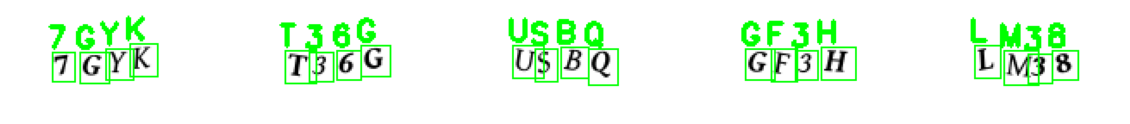

In [52]:
plt.figure(figsize=(20, 20))
for i,img in enumerate(out[:5]):
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis("off")